In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

import os
from share.helper_functions import(
    download_if_not_modified_today
)
from share.rogalski_functions import(
    data_voi_df
)
import pandas as pd
from sorcery import dict_of
from share.helper_functions import (
    plot
)
import datetime
import numpy as np

In [2]:
data_dir = './Rogalski_data'
data_file = 'wojewodztwa.csv'
path = os.sep.join([data_dir,data_file])
download_command='./get_voi.sh'

download_if_not_modified_today(path, download_command)
df = pd.read_csv(path)

./Rogalski_data/wojewodztwa.csv exists
./Rogalski_data/wojewodztwa.csv was modified today, not downloading


In [3]:
dfc = data_voi_df(df, 'cases')
dfc

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,1408,526,285,536,722,1290,2116,502,365,148,990,1638,300,327,1029,962
2021-12-07,1727,1293,802,552,1371,1444,2790,484,789,307,1306,2033,446,901,1917,1036
2021-12-08,2500,1407,900,722,1679,2505,4035,827,900,539,1760,4234,652,1218,3166,1275
2021-12-09,2578,1530,762,964,1628,2426,3969,1004,950,400,1677,3709,622,973,2543,1549


In [4]:
dfd = data_voi_df(df, 'deaths')
dfd

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,0,6,0,2,0,7,1,0,0,0,1,4,0,2,0,2
2021-12-07,29,43,42,12,25,39,62,22,30,18,21,81,12,25,32,11
2021-12-08,33,36,45,6,62,30,78,32,23,43,19,56,21,37,46,25
2021-12-09,28,39,34,12,33,80,80,23,33,29,24,46,7,20,49,25


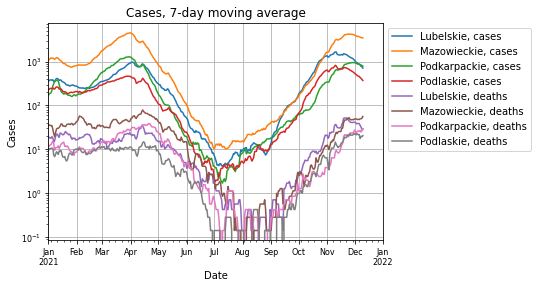

In [5]:
voivodships = ['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()
# display(dfq)

plotopts = dict_of(
    plotdfs=[dfq, dfp],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,1,1)),
    legendlabels = legendlabels,
    logy = True
    )

plot(**plotopts);



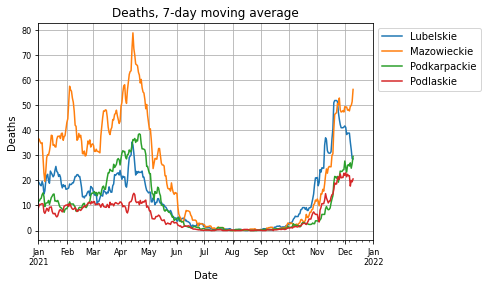

In [6]:
plotopts = dict_of(
    plotdfs=[dfp],
    xlabel = 'Date',
    ylabel = 'Deaths',
    title = f'Deaths, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,1,1)),
    )

plot(**plotopts);

In [18]:
voivodships = ['Podkarpackie']
dfq=dfc[voivodships].rolling(7).mean()

dfq2020 =dfq[dfq.index <  pd.to_datetime(datetime.date(2021,1,1))].copy(deep = True)
dfq2021 = dfq[dfq.index >=  pd.to_datetime(datetime.date(2021,1,1))].copy(deep=True)

# To nie działa ( https://www.codegrepper.com/code-examples/python/pandas+day+and+month+no+year+to+datetime )

dfq2020.index = pd.to_datetime(dfq2020.index).dt.to_period('M') #pd.to_datetime(dfq2020.index.strftime('%d-%m'))
dfq2021.index = pd.to_datetime(dfq2021.index).dt.to_period('M') #pd.to_datetime(dfq2021.index.strftime('%d-%m'))

legendlabels_2020 = [voi + ', 2020' for voi in voivodships]
legendlabels_2021 = [voi + ', 2021' for voi in voivodships]
legendlabels = legendlabels_2020 + legendlabels_2021

plotopts = dict_of(
    plotdfs=[dfq2020, dfq2021],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    legendlabels = legendlabels
    )

plot(**plotopts);

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [20]:
ts = pd.Series(pd.to_datetime(['2013-02-21 10:12:14.3']))
ts.dt.dayofyear

0    52
dtype: int64

In [21]:
dfq['Day of year'] = dfq.index.dayofyear

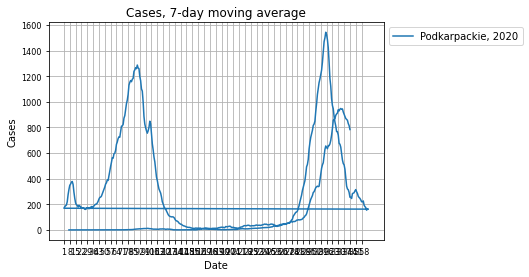

In [22]:
plotopts = dict_of(
    plotdfs=[dfq],
    x = 'Day of year',
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    legendlabels = legendlabels
    )

plot(**plotopts);

/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


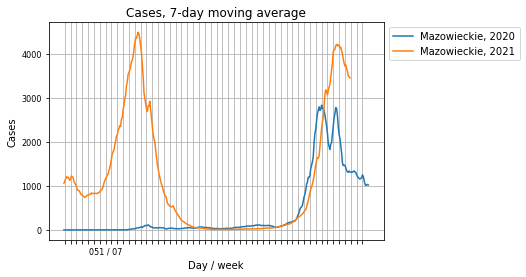

In [23]:
voivodships = ['Mazowieckie']
dfq=dfc[voivodships].rolling(7).mean()

start_date = pd.to_datetime('2020.01.01')
end_date = pd.to_datetime('2020.03.10')
for day in pd.date_range(start_date, end_date):
     dfq.loc[day] = 0.0
dfq = dfq.sort_index()

dfq['Day / week'] = dfq.index.strftime('%j / %V')

dfq2020 =dfq[dfq.index <  pd.to_datetime(datetime.date(2021,1,1))].copy(deep = True)
dfq2021 = dfq[dfq.index >=  pd.to_datetime(datetime.date(2021,1,1))].copy(deep=True)


legendlabels_2020 = [voi + ', 2020' for voi in voivodships]
legendlabels_2021 = [voi + ', 2021' for voi in voivodships]
legendlabels = legendlabels_2020 + legendlabels_2021

plotopts = dict_of(
    plotdfs=[dfq2020, dfq2021],
    x = 'Day / week',
    xlabel = 'Day / week',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    legendlabels = legendlabels
    )

plot(**plotopts);